# **KELOMPOK 2 - PROJECT UAS SAINS DATA**
Anggota Kelompok:
- Haifa Marwa Saniyyah (2206048783)
- Halimah As-Sajidah (2206048820)
- Hanny Awlia (2206048751)
- Rahma Chuzaima (2206048732)
- Reizka Fathia (2206052755)

In [ ]:
# fundamental libraries
import numpy as np
import pandas as pd

# libraries untuk visualization
import matplotlib.pyplot ass plt
import seaborn as sns

# libraries untuk data preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder # encoding fitur kategorik menjadi numerik

# machine learning models dan tools
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# utilities untuk model evaluation dan selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# libraries untuk model visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# utility libraries
from tqdm import tqdm # menampilkan progress bar
import time # mengukur waktu eksekusi

# **IMPORT DATASET**

In [ ]:
! pip install kaggle

In [ ]:
# mendownload dataset dari Kaggle menggunakan Kaggle API
! kaggle datasets download laotse/credit-risk-dataset

# mengekstrak file dataset
! unzip credit-risk-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
credit-risk-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  credit-risk-dataset.zip
replace credit_risk_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: credit_risk_dataset.csv  


In [ ]:
# membaca file CSV menjadi DataFrame pandas
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# ringkasan statistik untuk kolom-kolom kategorik
df.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [ ]:
# menganalisis target variable 'loan_status'
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

Menghitung frekuensi masing-masing nilai unik dalam kolom 'loan_status' dan menormalkan hasilnya sehingga frekuensi tersebut dinyatakan sebagai proporsi (persentase) dari total.

# **EXPLORATORY DATA ANALYSIS (EDA)**

<Figure size 1200x800 with 0 Axes>

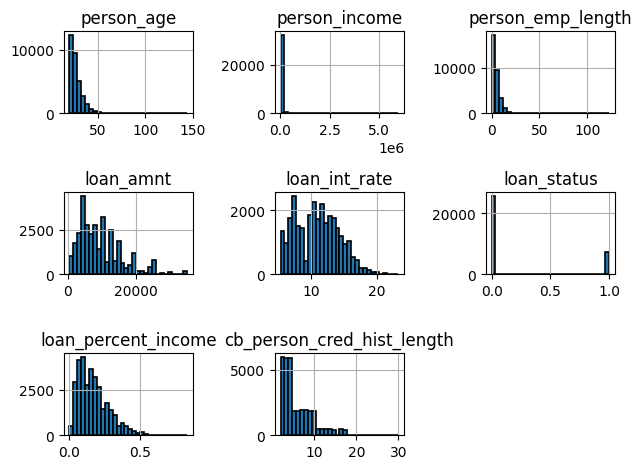

In [ ]:
# distribusi fitur numerik menggunakan histogram
plt.figure(figsize=(12, 8))
df[df.select_dtypes(include=['float64', 'int64']).columns].hist(bins=30, edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()

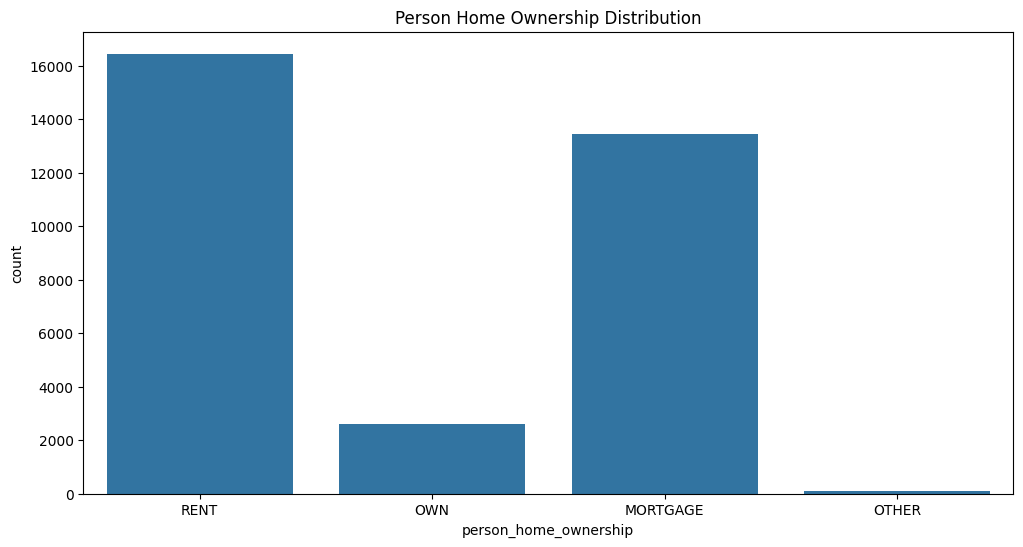

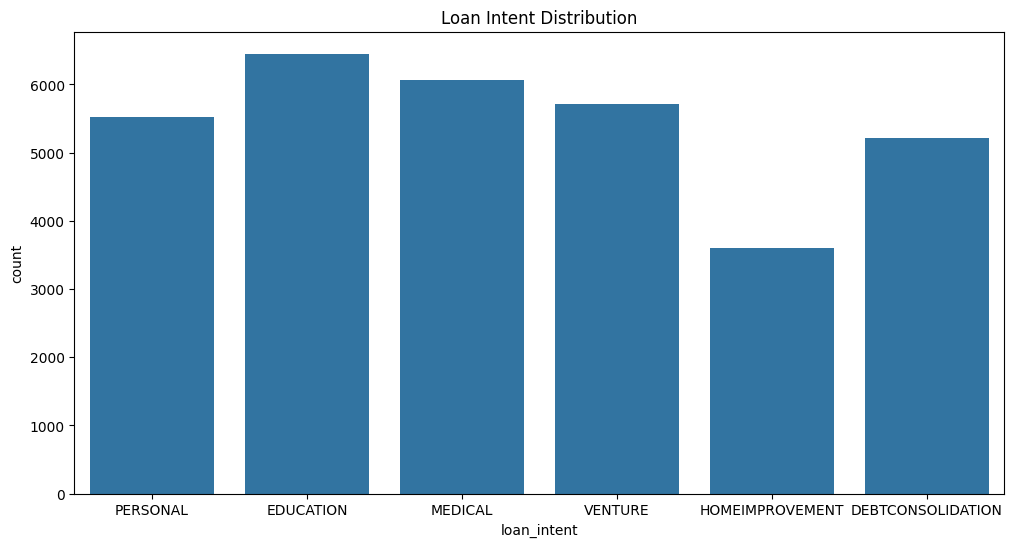

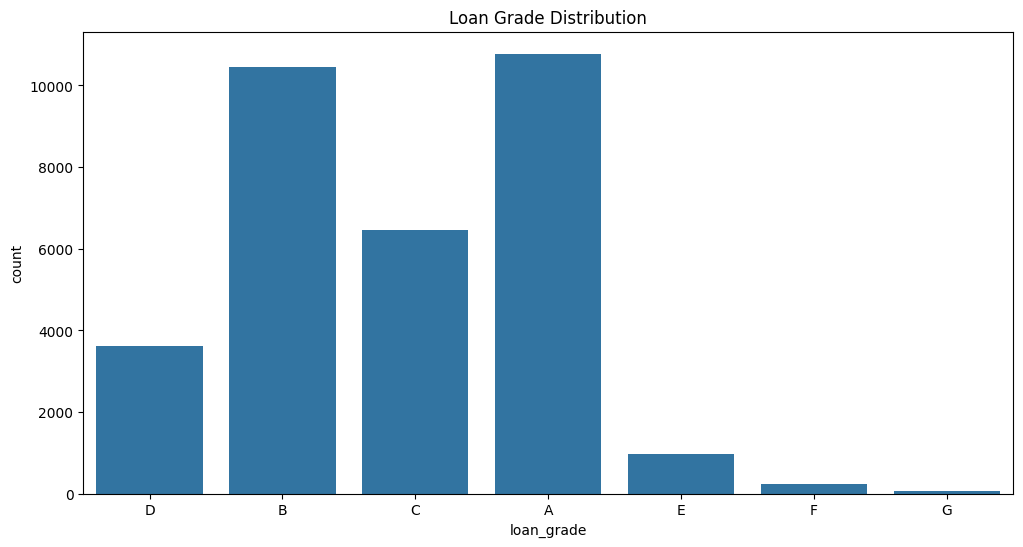

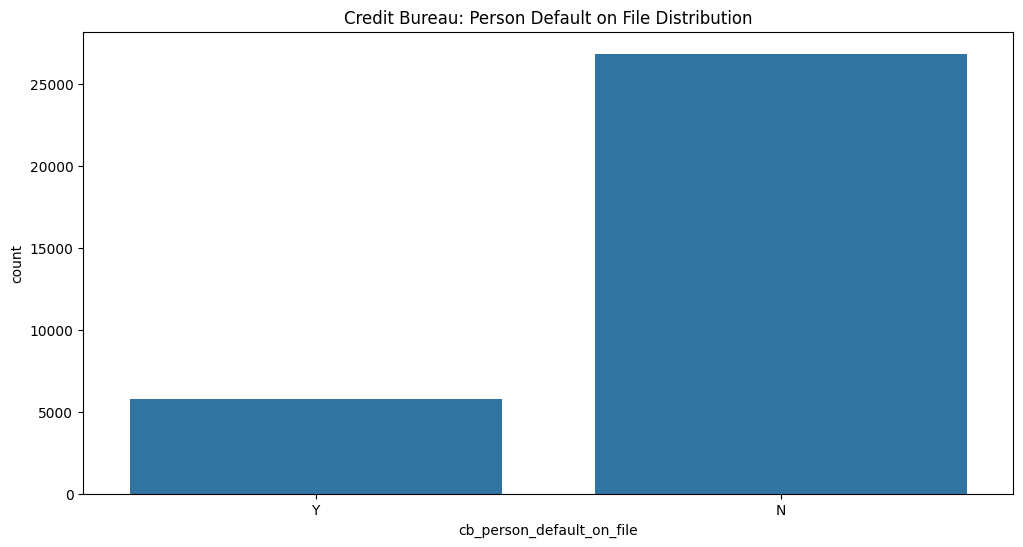

In [ ]:
# distribusi fitur kategorik
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='person_home_ownership')
plt.title('Person Home Ownership Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_intent')
plt.title('Loan Intent Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='loan_grade')
plt.title('Loan Grade Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='cb_person_default_on_file')
plt.title('Credit Bureau: Person Default on File Distribution')
plt.show()

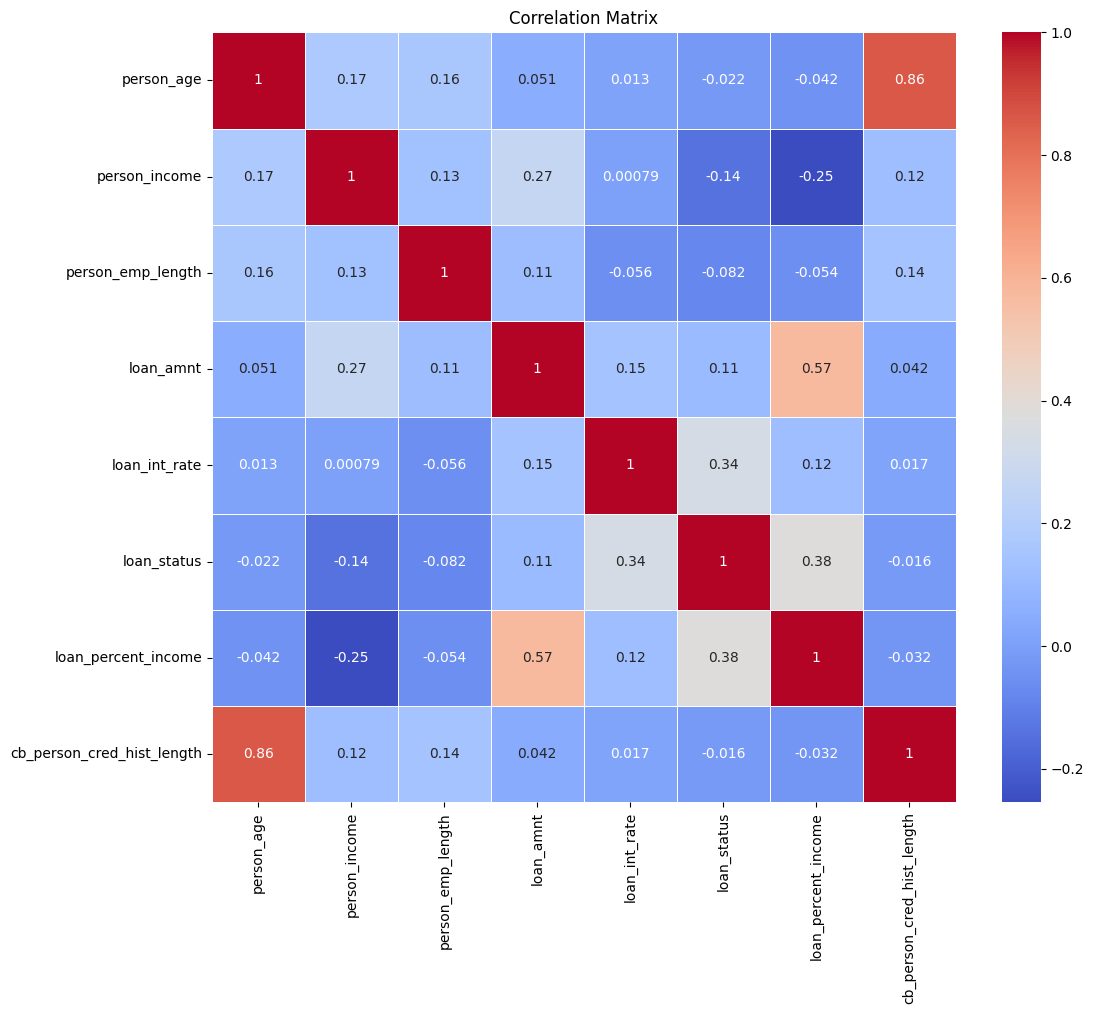

In [ ]:
# membuat heatmap untuk menampilkan matriks korelasi dari fitur numerik
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **PREPROCESSING**

## **MENANGANI MISSING VALUES DENGAN METODE IMPUTASI**

In [ ]:
# memeriksa missing values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# menangani missing values menggunakan metode imputasi dengan strategi mean
imputer = SimpleImputer(strategy='mean')

# pilih kolom-kolom numerik (float64)
numeric_columns = df.select_dtypes(include=['float64']).columns

# mengisi nilai yang hilang dengan mean untuk kolom numerik
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [ ]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

##**MENANGANI OUTLIERS**

<Axes: >

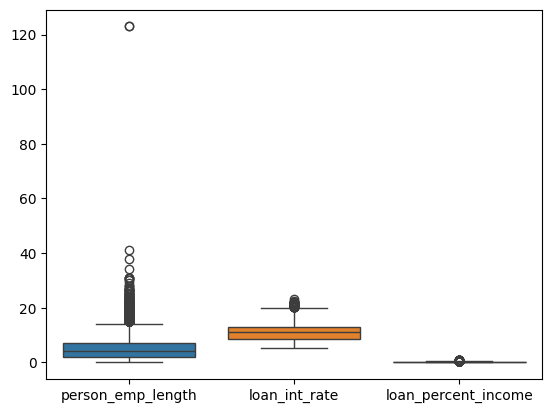

In [ ]:
# membuat boxplot untuk kolom-kolom numerik ('float64')
sns.boxplot(df.select_dtypes(include=['float64']))

In [ ]:
# membatasi nilai-nilai pada kolom-kolom yang memiliki tipe data 'float64'
df_cleaned = df.copy()

# loop melalui setiap kolom dengan tipe data 'float64'
for col in df.select_dtypes(include=['float64']).columns:
    # menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan IQR (selisih antara Q3 dan Q1) dari setiap kolom:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # menghitung batas bawah dan batas atas untuk mendeteksi outlier:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # membuang nilai-nilai outlier
    df_cleaned[col] = df_cleaned[col].apply(lambda x: max(min(x, upper_bound), lower_bound))

    """
    Fungsi lambda memastikan bahwa nilai-nilai yang melebihi batas atas
    atau di bawah batas bawah akan diganti dengan nilai batas atas
    atau bawah yang sesuai.
    """

df_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,14.5,PERSONAL,D,35000,16.02,1,0.44,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.44,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.44,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.44,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.44,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Kode di atas bertujuan untuk mendeteksi dan membuang outlier pada kolom-kolom yang memiliki tipe data `'float64'` dengan menggunakan metode IQR (Interquartile Range).


**Menangani outlier pada 'person_age' dan 'person_emp_length':**
*   person_age: Sebagian besar individu berusia 20 hingga 60 tahun. Sehingga, agar lebih umum, individu dengan usia > 80 tahun akan dihapus.
*   person_emp_length: Sebagian besar individu memiliki pengalaman kerja kurang dari 40 tahun. Sehingga, individu dengan pengalaman kerja > 60 tahun akan dihapus.

In [ ]:
# menghapus baris dengan usia lebih dari 80
df_cleaned = df_cleaned.drop(df[df['person_age'] > 80].index, axis=0)

# menghapus baris dengan lama kerja lebih dari 60 tahun
df_cleaned = df_cleaned.drop(df[df['person_emp_length'] > 60].index, axis=0)

In [ ]:
# menampilkan kembali boxplot kolom-kolom numerik 'float64' setelah penanganan outliers
df_cleaned.select_dtypes(include=['float64'])

,person_emp_length,loan_int_rate,loan_percent_income
1,5.0,11.14,0.10
2,1.0,12.87,0.44
3,4.0,15.23,0.44
4,8.0,14.27,0.44
5,2.0,7.14,0.25
...,...,...,...
32576,1.0,13.16,0.11
32577,4.0,7.49,0.15
32578,3.0,10.99,0.44
32579,5.0,11.48,0.10


## **ENCODING DATA KATEGORIK**

In [ ]:
# memilih kolom kategorik
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_categorical = df_cleaned[categorical_columns]

# one-hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical).toarray()

# mengkonversi hasil encoding menjadi DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# me-reset index sehingga tidak menghasilkan NaN
df = df_cleaned.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# menggabungkan DataFrame awal dengan DataFrame hasil encoding
df_preprocessed = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

df_preprocessed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5.0,1000,11.14,0,0.10,2,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,9600,1.0,5500,12.87,1,0.44,3,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,65500,4.0,35000,15.23,1,0.44,2,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24,54400,8.0,35000,14.27,1,0.44,4,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,21,9900,2.0,2500,7.14,1,0.25,2,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_preprocessed.isna().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [ ]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32572 entries, 0 to 32571
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      32572 non-null  int64  
 1   person_income                   32572 non-null  int64  
 2   person_emp_length               32572 non-null  float64
 3   loan_amnt                       32572 non-null  int64  
 4   loan_int_rate                   32572 non-null  float64
 5   loan_status                     32572 non-null  int64  
 6   loan_percent_income             32572 non-null  float64
 7   cb_person_cred_hist_length      32572 non-null  int64  
 8   person_home_ownership_MORTGAGE  32572 non-null  float64
 9   person_home_ownership_OTHER     32572 non-null  float64
 10  person_home_ownership_OWN       32572 non-null  float64
 11  person_home_ownership_RENT      32572 non-null  float64
 12  loan_intent_DEBTCONSOLIDATION   

## **TRAIN-TEST-SPLIT**

In [ ]:
# menghapus kolom loan_status dan menyimpan data dalam X
X = df_preprocessed.drop(['loan_status'], axis=1)

# memilih kolom loan_status dan menyimpannya dalam Y
y = df_preprocessed['loan_status']

In [ ]:
# membagi data menjadi dua bagian, yaitu 80% data training dan 20% data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26057, 26) (6515, 26) (26057,) (6515,)


In [ ]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
24380,31,50000,1.0,10000,12.690000,0.20,8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26981,27,120000,10.0,7000,5.990000,0.06,5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1338,22,28000,6.0,1000,10.250000,0.04,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26034,31,65000,13.0,13000,11.011695,0.20,8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28749,35,40000,0.0,5000,6.920000,0.13,7,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,43,39000,12.0,8000,9.990000,0.21,16,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,24,45000,8.0,5000,5.790000,0.11,3,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,21,23000,6.0,3000,13.350000,0.13,3,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15795,24,79200,3.0,16000,12.670000,0.20,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_train

24380    0
26981    0
1338     1
26034    0
28749    0
        ..
29802    0
5390     0
860      0
15795    1
23654    0
Name: loan_status, Length: 26057, dtype: int64

# **MODEL SELECTION DAN HYPERPARAMETER TUNING MENGGUNAKAN GRIDSEARCHCV**

In [ ]:
# definisikan parameter model
# dan kamus yang berisi daftar model yang akan dievaluasi bersama dengan parameter hyperparameter yang akan dioptimalkan untuk setiap model
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 300, 500], # daftar nilai untuk jumlah pohon
        }
    },
    'svm': {
        'model': SVC(max_iter=500),
        'params': {
            'C': [1, 10], # daftar nilai untuk parameter regularisasi
            'kernel': ['rbf', 'linear'], # jenis fungsi kernel
            'gamma': ['scale'] # koefisien kernel untuk 'rbf', 'poly', dan 'sigmoid'
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [2, 3, 4, 5], # kedalaman maksimum pohon
            'min_samples_split': [2, 5], # daftar nilai untuk jumlah minimum sampel untuk membagi internal node
            'min_samples_leaf': [1, 2] # daftar nilai untuk jumlah minimum sampel per leaf node
        }
    }
}

# inisialisasi array kosong untuk menyimpan hasil evaluasi model
scores = []

# loop melalui setiap model dan lakukan GridSearchCV
for model_name, mp in tqdm(model_params.items(), desc="Models"):
    # inisialisasi GridSearchCV dengan parameter yang diberikan
    print(f"Training {model_name} model...")
    clf = GridSearchCV(
        estimator=mp['model'],
        param_grid=mp['params'],
        cv=3,
        n_jobs=1,
        verbose=2 # memunculkan progress
    )

    # fit model dengan data training
    clf.fit(X_train, y_train)

    # melakukan prediksi pada data test
    y_pred = clf.predict(X_test)

    # menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # simpan hasil terbaik
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'accuracy': accuracy
    })
    print("Training done!")
    print()

# menampilkan hasil evaluasi untuk setiap model
for score in scores:
    print(f"Model: {score['model']}, Best Score: {score['best_score']}, Best Params: {score['best_params']}, Accuracy: {score['accuracy']}")

# menentukan model dengan best score tertinggi
best_model_info = max(scores, key=lambda x: x['best_score'])

print(f"Best Model: {best_model_info['model']} with params: {best_model_info['best_params']}")

Models:   0%|          | 0/3 [00:00<?, ?it/s]

Training random_forest model...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ...................................n_estimators=100; total time=   4.4s
[CV] END ...................................n_estimators=100; total time=   2.8s
[CV] END ...................................n_estimators=100; total time=   3.5s
[CV] END ...................................n_estimators=300; total time=   8.4s
[CV] END ...................................n_estimators=300; total time=  10.4s
[CV] END ...................................n_estimators=300; total time=   8.9s
[CV] END ...................................n_estimators=500; total time=  14.5s
[CV] END ...................................n_estimators=500; total time=  14.5s
[CV] END ...................................n_estimators=500; total time=  14.6s


Models:  33%|███▎      | 1/3 [01:44<03:28, 104.28s/it]

Training done!

Training svm model...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   1.9s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   2.7s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
Models:  67%|██████▋   | 2/3 [01:58<00:51, 51.01s/it] 

Training done!

Training decision_tree model...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=2, min_samples_leaf=2, min_samples_split=5; total ti

Models: 100%|██████████| 3/3 [02:00<00:00, 40.18s/it]

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
Training done!

Model: random_forest, Best Score: 0.9325577382587937, Best Params: {'n_estimators': 500}, Accuracy: 0.93646408839779
Model: svm, Best Score: 0.37658216031554304, Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}, Accuracy: 0.7403314917127072
Model: decision_tree, Best Score: 0.9030837492537352, Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}, Accuracy: 0.9066912216083487
Best Model: random_forest with params: {'n_estimators': 500}


In [ ]:
# membuat DataFrame dari hasil yang disimpan dalam list 'scores'
results_df = pd.DataFrame(scores)

# menampilkan DataFrame
results_df

,model,best_score,best_params,accuracy
0,random_forest,0.931573,{'n_estimators': 500},0.937529
1,svm,0.761215,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.251727
2,decision_tree,0.901907,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.908672


In [ ]:
# split data ulang dengan rasio terbaik berdasarkan Cross-Validation
split_ratios = [0.7, 0.75, 0.8, 0.85, 0.9]
results = []

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    model = RandomForestClassifier(n_estimators=best_model_info['best_params']['n_estimators'], random_state=42)

    # Menggunakan K-Fold Cross-Validation pada training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, verbose=2, scoring='accuracy')

    results.append((ratio, cv_scores.mean()))

# Menampilkan hasil evaluasi untuk setiap rasio
for ratio, score in results:
    print(f"Train-Test Split Ratio: {ratio}, Cross-Validation Accuracy: {score}")

# Menentukan rasio terbaik berdasarkan hasil Cross-Validation
best_ratio = max(results, key=lambda x: x[1])[0]
print(f"Best Train-Test Split Ratio: {best_ratio}")

[CV] END .................................................... total time=  15.0s
[CV] END .................................................... total time=  11.2s
[CV] END .................................................... total time=  10.1s
[CV] END .................................................... total time=  11.9s
[CV] END .................................................... total time=  11.7s
[CV] END .................................................... total time=  12.0s
[CV] END .................................................... total time=  13.1s
[CV] END .................................................... total time=  13.2s
[CV] END .................................................... total time=  13.3s
[CV] END .................................................... total time=  15.2s
[CV] END .................................................... total time=  13.7s
[CV] END .................................................... total time=  14.4s
[CV] END ...................

In [ ]:
# memisahkan data menjadi data pelatihan dan data pengujian dengan rasio terbaik
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-best_ratio, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29314, 26) (3258, 26) (29314,) (3258,)


# **RANDOM FOREST DAN FEATURE IMPORTANCE**

Meningkatkan Performa Model dengan Random Forest dan Feature Importance.

In [ ]:
# inisialisasi dan melatih Random Forest
rf = RandomForestClassifier(n_estimators=best_model_info['best_params']['n_estimators'], random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
# mengekstrak feature importances
feature_importances = rf.feature_importances_
features = X_train.columns

In [ ]:
# membuat DataFrame
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
})

importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df

,feature,importance
5,loan_percent_income,0.222333
1,person_income,0.143475
4,loan_int_rate,0.111349
3,loan_amnt,0.073829
2,person_emp_length,0.060295
10,person_home_ownership_RENT,0.055202
20,loan_grade_D,0.053151
0,person_age,0.045128
6,cb_person_cred_hist_length,0.034650
7,person_home_ownership_MORTGAGE,0.027862


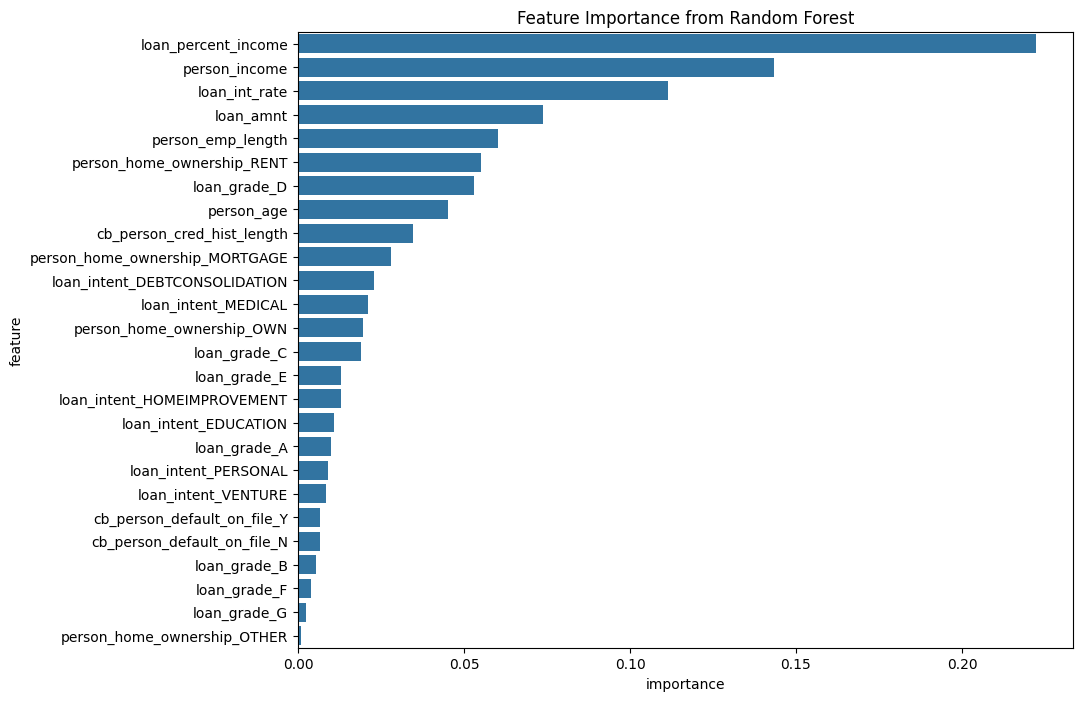

In [ ]:
# visualisasi
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
# pemilihan fitur yang penting
threshold = 0.01
selected_features = importance_df[importance_df['importance'] > threshold]['feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

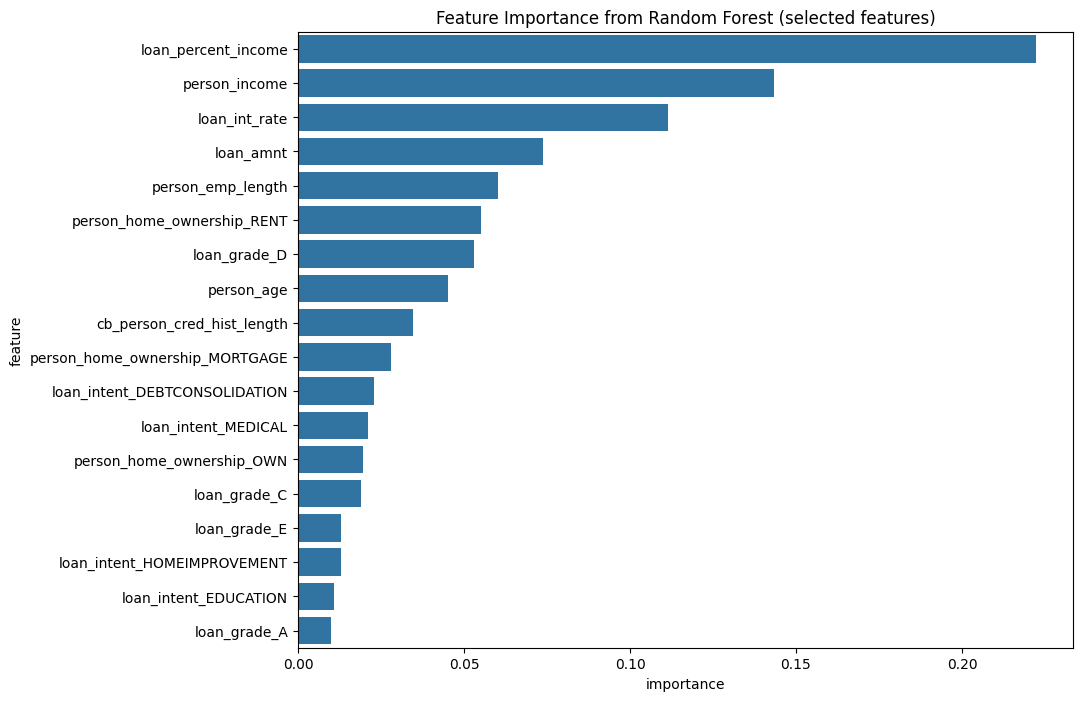

In [ ]:
# visualisasi feature importance setelah pemilihan fitur
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=importance_df[importance_df['importance'] > threshold])
plt.title('Feature Importance from Random Forest (selected features)')
plt.show()

In [ ]:
# interaksi fitur
X_train_selected['interaction_loan_income'] = X_train_selected['loan_percent_income'] * X_train_selected['person_income']
X_test_selected['interaction_loan_income'] = X_test_selected['loan_percent_income'] * X_test_selected['person_income']

<ipython-input-104-e901ff489027>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_selected['interaction_loan_income'] = X_train_selected['loan_percent_income'] * X_train_selected['person_income']
<ipython-input-104-e901ff489027>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_selected['interaction_loan_income'] = X_test_selected['loan_percent_income'] * X_test_selected['person_income']


In [ ]:
# pelatihan ulang model
rf_selected = RandomForestClassifier(n_estimators=best_model_info['best_params']['n_estimators'], random_state=42)
rf_selected.fit(X_train_selected, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
# melakukan prediksi menggunakan model yang telah diperbarui
y_pred_selected = rf_selected.predict(X_test_selected)

# **EVALUASI MODEL**

In [ ]:
# evaluasi performa model baru
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)

Accuracy with selected features: 0.9349294045426643


In [ ]:
# visualisasi confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2516   25]
 [ 187  530]]


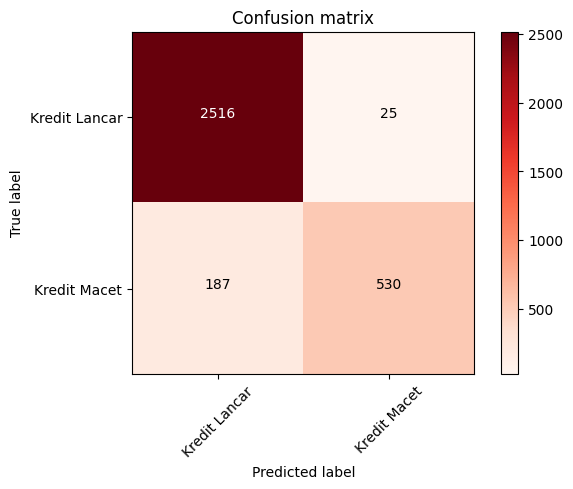

In [ ]:
#confusion matrix
cnf_matrix =confusion_matrix(y_test, y_pred_selected, labels=[0,1])
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Kredit Lancar', 'Kredit Macet'],normalize = False, title='Confusion matrix')

In [ ]:
print(classification_report(y_test,y_pred_selected))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2541
           1       0.95      0.74      0.83       717

    accuracy                           0.93      3258
   macro avg       0.94      0.86      0.90      3258
weighted avg       0.94      0.93      0.93      3258

